## Importing libraries

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None
 
# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore")

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import *

## Data loading

In [10]:
df = pd.read_csv('../data/raw/WrestlingWorldTournament.csv', index_col=0)

In [11]:
df.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


Comprobemos antes de nada si tenemos valores duplicados.

In [19]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB


Vemos que, de un total de 500 datos no tenemos valores duplicados ni valores nulos.

---

### Columns information understanding

- `name`: Athlete's name. This is a categorical variable that uniquely identifies each athlete.  

- `gender`: Athlete's gender. This is a categorical variable indicating whether the athlete is male ("Male") or female ("Female"). 

- `age`: Athlete's age. This is a numerical variable representing the athlete's age in years.

- `height`: Athlete's height. This is a numerical variable representing the athlete's height in centimeters.

- `nationality`: Athlete's nationality. This is a categorical variable indicating the athlete's country of origin.

- `weight`: Athlete's weight. This is a numerical variable representing the athlete's weight in kilograms.

- `sports`: Sports practiced by the athlete. This is a categorical variable that can contain multiple values (sports) separated by commas.

- `hours_per_day`: Training hours per day. This is a numerical variable indicating the average number of hours the athlete trains daily.

- `strength`: Athlete's strength. This is a numerical variable representing the evaluation of the athlete's strength on a scale (e.g., from 1 to 10).

- `agility`: Athlete's agility. This is a numerical variable representing the evaluation of the athlete's agility on a scale (e.g., from 1 to 10).

- `mental`: Athlete's mental capacity. This is a numerical variable representing the evaluation of the athlete's mental capacity on a scale (e.g., from 1 to 10).

- `federation`: Federation to which the athlete belongs. This is a categorical variable indicating the sports organization the athlete is affiliated with.

- `year_start`: Start year. This is a numerical variable indicating the year the athlete began their career or joined the federation.

- `rank`: Athlete's rank. This is a numerical variable representing the athlete's position or ranking in their discipline or federation.


### Categoric variables

In [25]:
cat_cols = df.select_dtypes(include=['O', 'category']).columns.to_list()

for col in cat_cols:
    print(f"Checking column {col}")

    checker(df, col)
    display((value_counts(df, col)).head())
    print("-----------------------------")

Checking column name
Number of entries: 500.
Number of name distinct entries: 500.
Number of name duplicated: 0.
Number of name null: 0.
The number of unique values for this category is 500


,count,proportion
name,,
Aaron Peavy,1,0.0
Matt Bailey,1,0.0
Milton Rico,1,0.0
Mickey Lister,1,0.0
Micheal Kurz,1,0.0


-----------------------------
Checking column gender
Number of entries: 500.
Number of gender distinct entries: 2.
Number of gender duplicated: 498.
Number of gender null: 0.
The number of unique values for this category is 2


,count,proportion
gender,,
Female,265,0.53
Male,235,0.47


-----------------------------
Checking column nationality
Number of entries: 500.
Number of nationality distinct entries: 8.
Number of nationality duplicated: 492.
Number of nationality null: 0.
The number of unique values for this category is 8


,count,proportion
nationality,,
France,118,0.24
Japan,116,0.23
USA,115,0.23
Australia,64,0.13
Egypt,42,0.08


-----------------------------
Checking column sports
Number of entries: 500.
Number of sports distinct entries: 31.
Number of sports duplicated: 469.
Number of sports null: 0.
The number of unique values for this category is 31


,count,proportion
sports,,
Karate,42,0.08
MMA,34,0.07
Boxing,33,0.07
"Boxing, MMA",31,0.06
Judo,29,0.06


-----------------------------
Checking column federation
Number of entries: 500.
Number of federation distinct entries: 3.
Number of federation duplicated: 497.
Number of federation null: 0.
The number of unique values for this category is 3


,count,proportion
federation,,
Fight Zone Wrestling,206,0.41
Consejo Global de Lucha Libre,192,0.38
World Wrestling Entertainment,102,0.20


-----------------------------


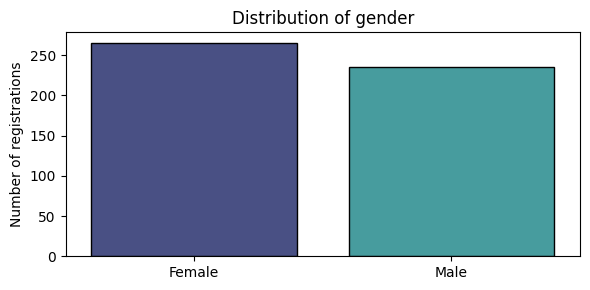

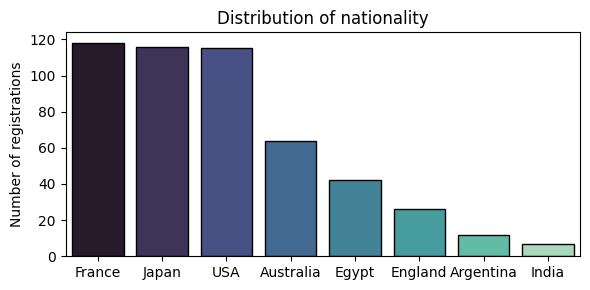

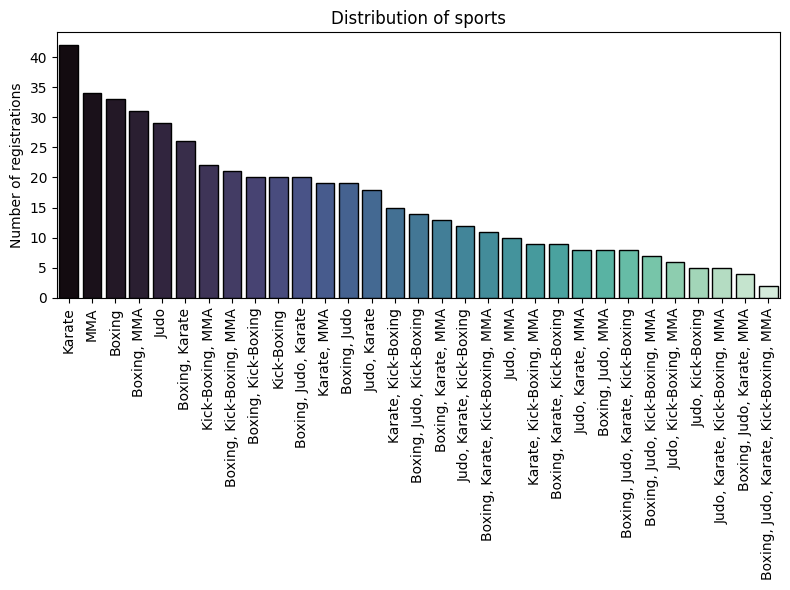

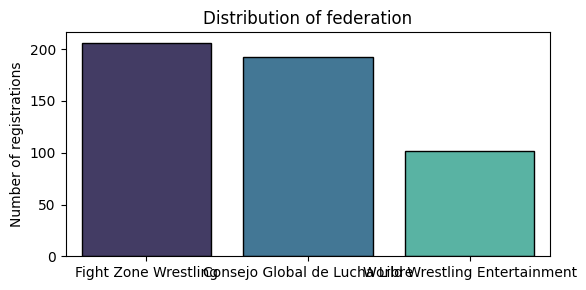

In [36]:
for col in cat_cols:

    # Exclude name since all entries are unique
    if col == 'name':
        continue

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df, col, size=size, rotation=rot)

### Numeric variables

In [37]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,500.0,31.15,5.44,18.0,27.00,31.0,35.00,53.0
height,500.0,174.86,9.47,152.0,167.50,174.0,181.62,202.0
weight,500.0,89.69,11.08,65.0,81.00,89.0,98.00,123.0
hours_per_day,500.0,3.06,1.38,0.0,2.00,3.0,4.00,8.0
strength,500.0,6.15,1.57,2.0,5.00,6.0,7.00,10.0
agility,500.0,7.15,1.46,3.0,6.00,7.0,8.00,10.0
mental,500.0,6.73,1.20,3.0,6.00,7.0,8.00,10.0
year_start,500.0,2007.13,6.33,1986.0,2003.00,2007.0,2011.00,2021.0
rank,500.0,250.50,144.48,1.0,125.75,250.5,375.25,500.0


- `name`: We observe that all names are indeed unique; however, using names as identifiers is risky since there may be two or more people with the same name.  

- `gender`: The distribution is quite balanced, with 53% women and 47% men.  

- `age`: The average age is approximately 31 years, with a minimum of 18 (legal age) and a maximum of 53.  

- `height`: The shortest athlete is 152 cm, while the tallest is 181.62 cm. It is noteworthy that the maximum height is relatively low, as this height, while considered tall, might be unexpectedly low in a sample of 500 people. It is possible that very tall individuals face challenges practicing the available sports.  

- `nationality`: There are 8 different nationalities, with France, Japan, and the USA standing out as the top three countries in terms of participation.  

- `weight`: The minimum weight is 65 kg, and the maximum is 123 kg. This range seems slightly high for athletes, especially given that some individuals are under 160 cm tall and the maximum height does not exceed 182 cm. However, in some sports, muscle mass plays a significant role, making these ranges realistic depending on the sport type.  

- `sports`: There are 31 different sports. Martial arts like Karate, MMA, Boxing, and Judo have the highest participation rates.  

- `hours_per_day`: The smallest value is 0, corresponding to individuals who do not train, while the maximum value is 8, equivalent to a full workday.  

- `strength`: On a scale of 1 to 10, the minimum value is 2, and the maximum is 10. The average is around 6.  

- `agility`: On a scale of 1 to 10, the minimum value is 3, and the maximum is 10. The average is around 7.  

- `mental`: On a scale of 1 to 10, the minimum value is 3, and the maximum is 8. The average is around 7.  

- `federation`: There are 3 types of organizations, all related to wrestling or martial arts.  

- `year_start`: The earliest athlete began their career in 1986, while the most recent started in 2021. The median is around 2007.  

- `rank`: Since all athletes belong to the same federation, these values are naturally unique, ranging from 1 to 500. As they are independent, we can treat them as unique identifiers. However, caution is necessary, as different rankings may exist, making this value non-unique. Furthermore, these values could change if the dataset is updated. For this static dataset, we will consider them truly unique.  

### Histograms

age


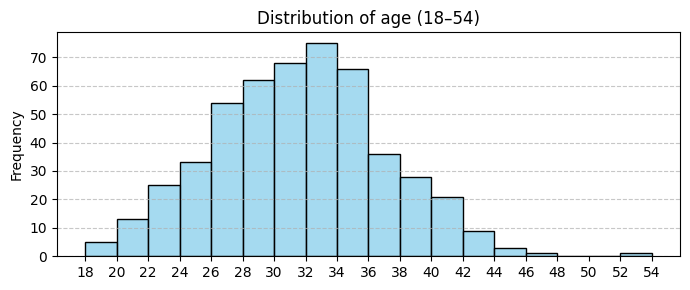

height


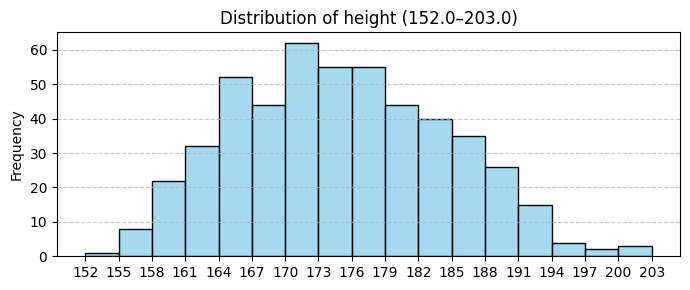

weight


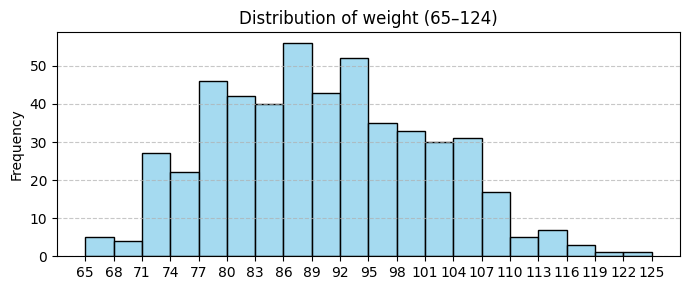

hours_per_day


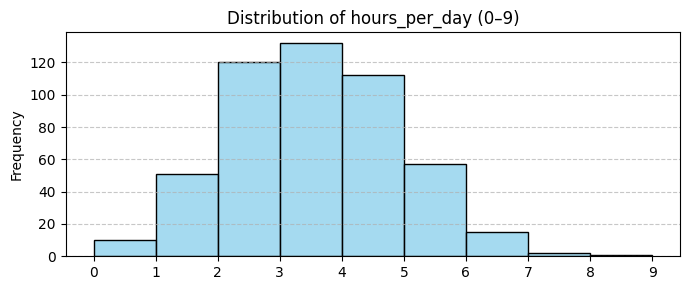

strength


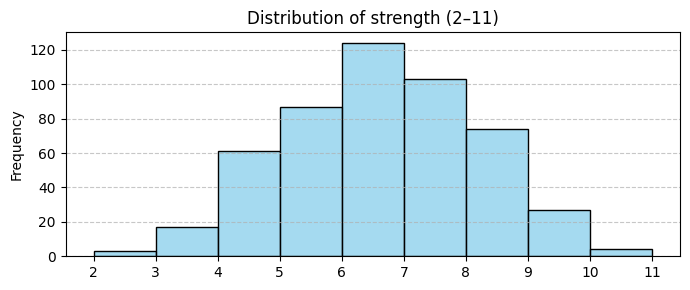

agility


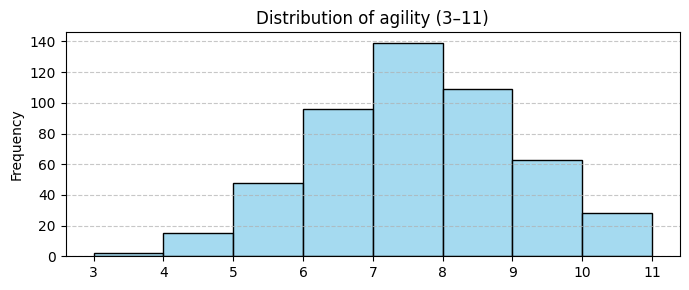

mental


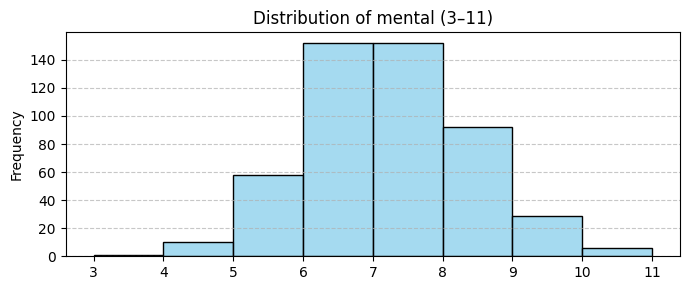

year_start


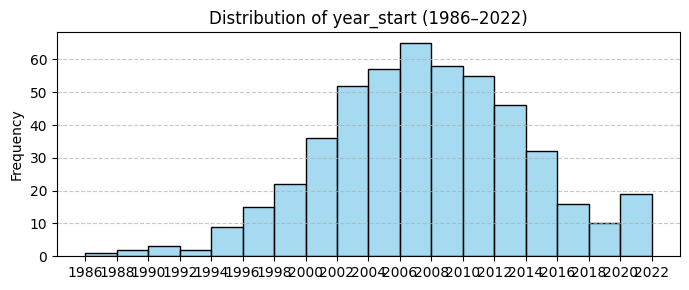

rank


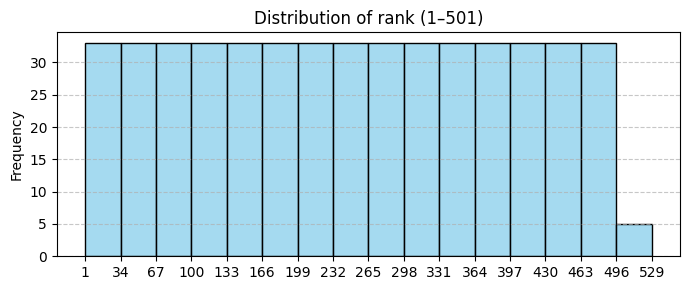

In [45]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()

for col in num_cols:
    print(col)
    quick_plot_numeric(df, col, 15, size=(7,3), rotation=0)

We observe that all variables follow an apparently normal distribution, except for `rank`, which follows a uniform distribution as previously mentioned.

### Outliers

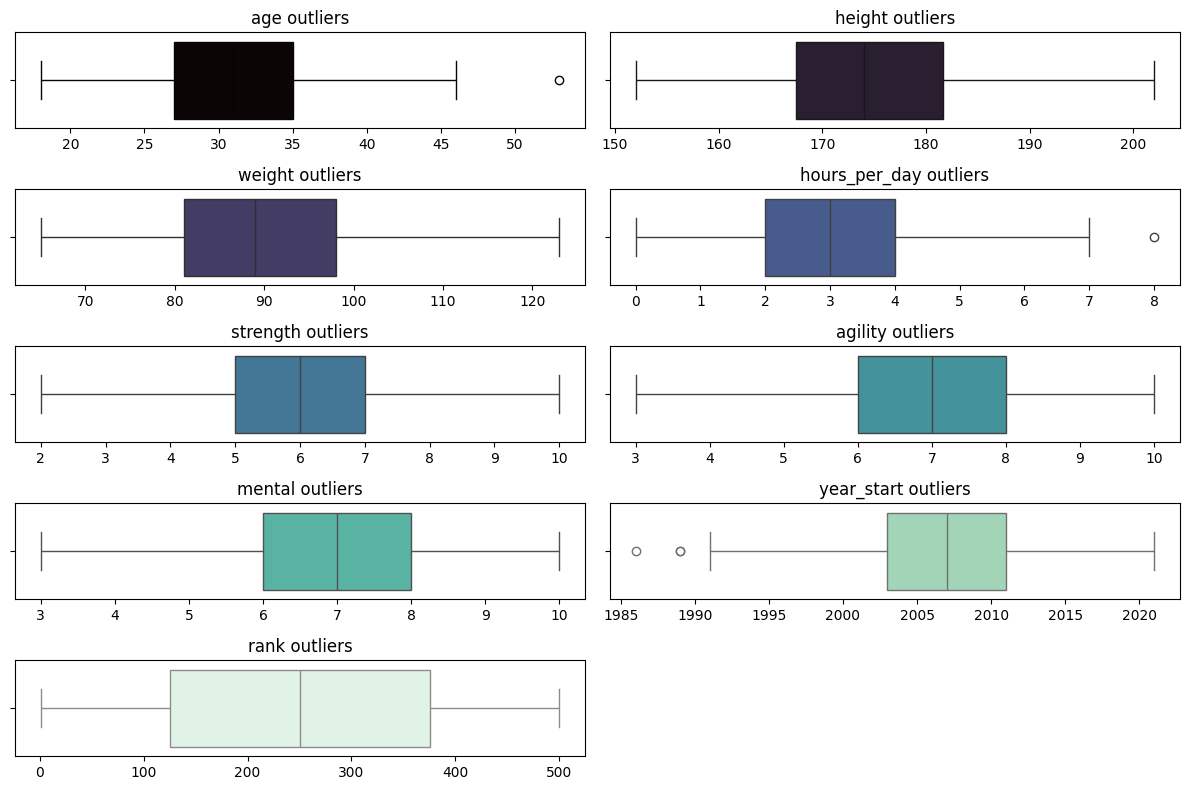

In [48]:
plot_outliers(df, size = (12, 8))

Regarding outliers, we only have one atypical value in `age` and a couple in `year_start`, corresponding to senior athletes and/or individuals with long careers as athletes. Additionally, there is an outlier for individuals who train 8 hours. However, all these values are perfectly plausible and do not appear to be errors.

## Plot correlation matrix

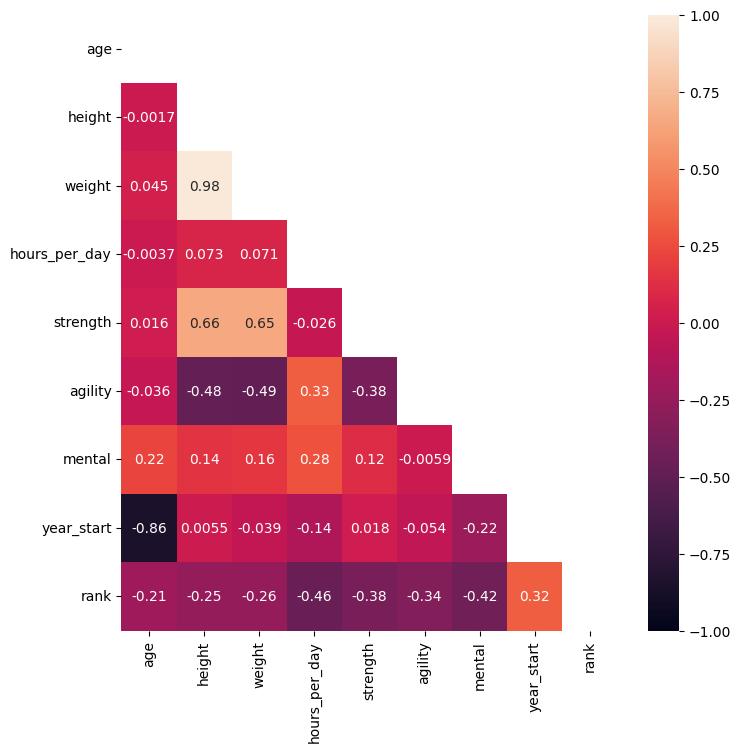

In [51]:
plot_correlation_matrix(df, size = (8, 8))

Como era de esperar hay una correlación muy fuerte y negativa entre el `year_start` y `age`. Sin embargo, pueden existir personas que tengan más edad y hayan comenzado más recientemente. Lo contrario es imposible ya que una persona no puede llevar más tiempo compitiendo que su edad.

También existe una relación entre `strength`y `agility`

Como estamos construyendo modelos de clustering, no vamos a eliminar ninguna columna por el momento.